In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Definir los datos
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '>40'],
    'Income': ['high', 'high', 'high', 'medium', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'medium'],
    'Student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no'],
    'Credit Rating': ['fair', 'excellent', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'fair', 'excellent'],
    'Loan': ['no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no']
}
# Crear el DataFrame
df = pd.DataFrame(data)
df

,ID,Age,Income,Student,Credit Rating,Loan
0,1,<=30,high,no,fair,no
1,2,<=30,high,no,excellent,no
2,3,31-40,high,no,fair,yes
3,4,>40,medium,no,fair,yes
4,5,>40,low,yes,excellent,no
5,6,31-40,low,yes,excellent,yes
6,7,<=30,medium,no,fair,no
7,8,<=30,low,yes,fair,yes
8,9,>40,medium,yes,fair,yes
9,10,<=30,medium,yes,excellent,yes


# VERSIÓN 1

In [ ]:
# Codificar las variables categóricas
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Separar características y variable objetivo
X = df.drop(columns=['Loan'])
y = df['Loan']

In [ ]:
# Entrenar el modelo
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

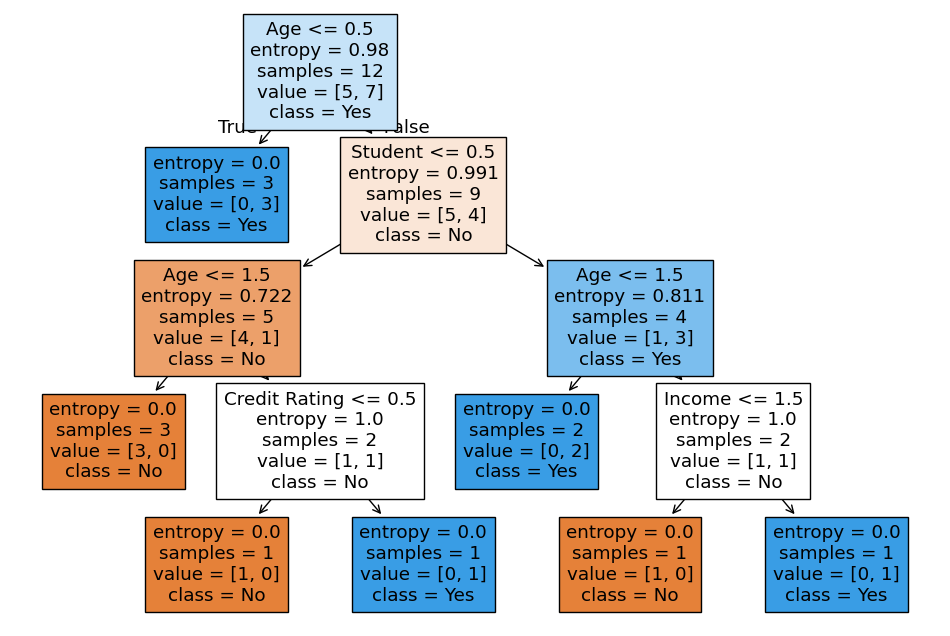

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

# Versión 2

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import graphviz
from sklearn import tree

In [ ]:
# Separar características y variable objetivo
X = df.drop(columns=['Loan'])
y = df['Loan']

In [ ]:
# Aplicar One-Hot Encoding a variables categóricas
categorical_features = ['Age', 'Income', 'Student', 'Credit Rating']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [ ]:
# Crear el modelo con un pipeline
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state=42))
])

In [ ]:
# Entrenar el modelo
clf.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Age', 'Income', 'Student',
                                                   'Credit Rating'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

In [ ]:
# Extraer el clasificador entrenado
dt = clf.named_steps['classifier']
feature_names = clf.named_steps['preprocessor'].get_feature_names_out()

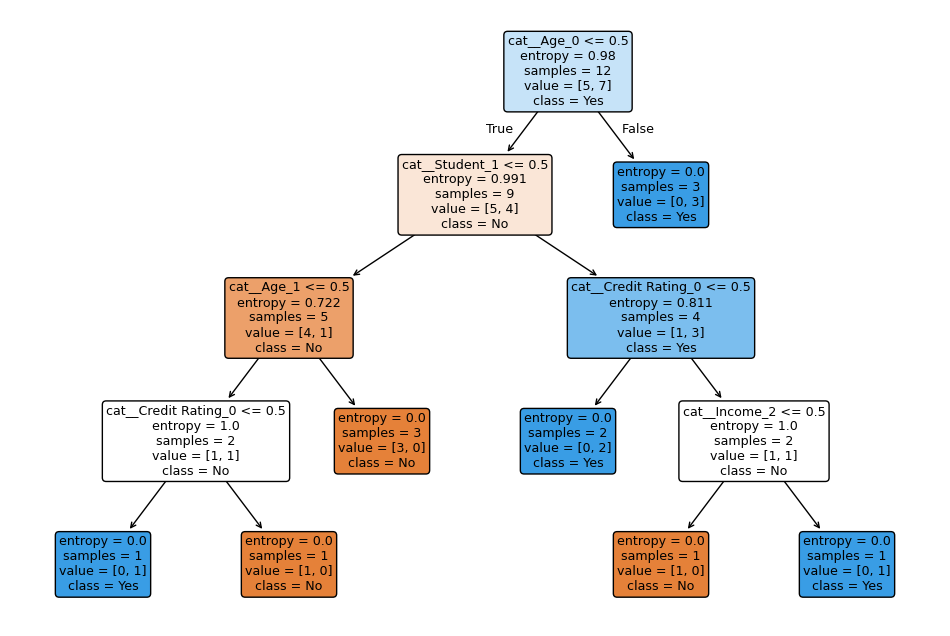

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=feature_names, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

# Versión 3

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['Age', 'Income', 'Student', 'Credit Rating', 'Loan']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Features and target variable
X = df[['Age', 'Income', 'Student', 'Credit Rating']]
y = df['Loan']

In [ ]:
# Train the decision tree
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

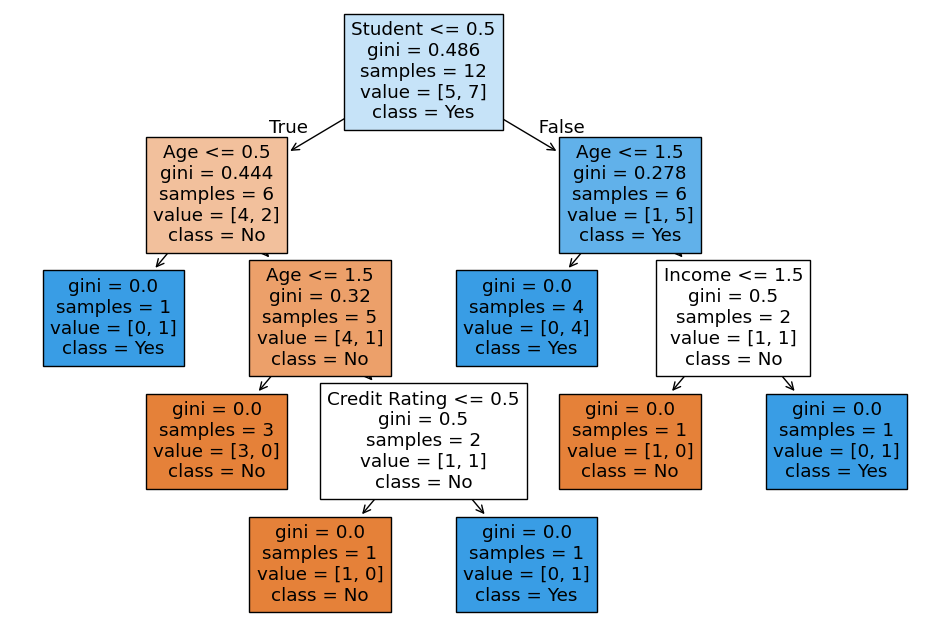

In [ ]:
# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=['Age', 'Income', 'Student', 'Credit Rating'], class_names=['No', 'Yes'])
plt.show()

# Versión 4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
# Create the dataset from the provided table
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '>40'],
    'Income': ['high', 'high', 'high', 'medium', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'medium'],
    'Student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no'],
    'Credit Rating': ['fair', 'excellent', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'fair', 'excellent'],
    'Loan': ['no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no']
}
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)
df

,ID,Age,Income,Student,Credit Rating,Loan
0,1,<=30,high,no,fair,no
1,2,<=30,high,no,excellent,no
2,3,31-40,high,no,fair,yes
3,4,>40,medium,no,fair,yes
4,5,>40,low,yes,excellent,no
5,6,31-40,low,yes,excellent,yes
6,7,<=30,medium,no,fair,no
7,8,<=30,low,yes,fair,yes
8,9,>40,medium,yes,fair,yes
9,10,<=30,medium,yes,excellent,yes


In [ ]:
# Drop the 'ID' column as it is not a feature
df = df.drop(columns=['ID'])

In [ ]:
# Encode categorical variables into numerical values
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['Loan'])
y = df['Loan']

In [ ]:
print(X)
print()
print(y)

    Age  Income  Student  Credit Rating
0     1       0        0              1
1     1       0        0              0
2     0       0        0              1
3     2       2        0              1
4     2       1        1              0
5     0       1        1              0
6     1       2        0              1
7     1       1        1              1
8     2       2        1              1
9     1       2        1              0
10    0       0        1              1
11    2       2        0              0

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     1
8     1
9     1
10    1
11    0
Name: Loan, dtype: int64


In [ ]:
# Split the dataset into training and testing sets (train=70%/Test=30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the Decision Tree Classifier- Use information gain or Gini impurity (default)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [ ]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [ ]:
# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1 0]
 [1 2]]


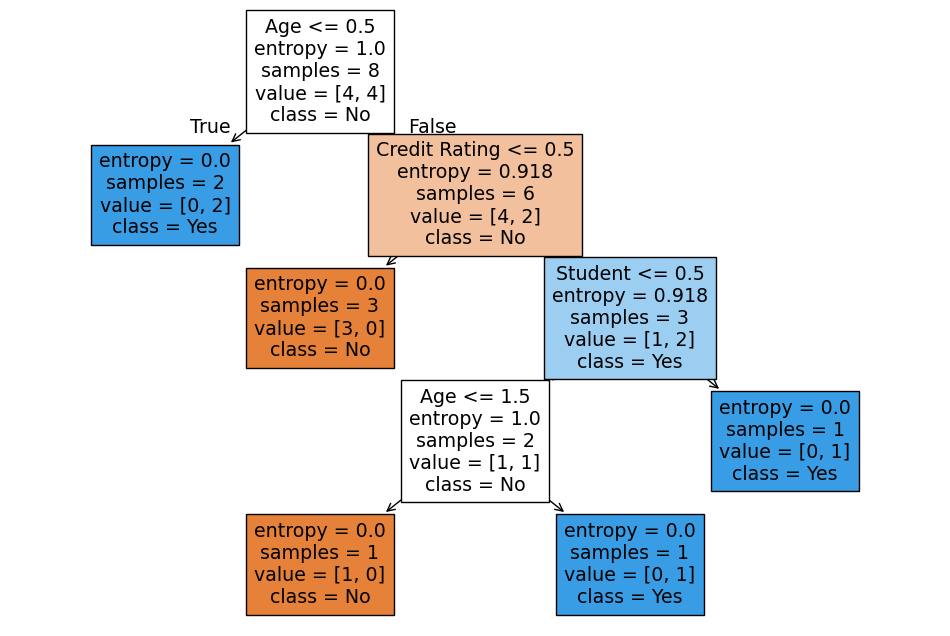

In [ ]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

# Versión 5
 As "wine" code but with ordinal encoding

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
# Create the dataset from the provided table
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '>40'],
    'Income': ['high', 'high', 'high', 'medium', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'medium'],
    'Student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no'],
    'Credit Rating': ['fair', 'excellent', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'fair', 'excellent'],
    'Loan': ['no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no']
}
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

In [ ]:
# Drop the 'ID' column as it is not a feature
df = df.drop(columns=['ID'])

In [ ]:
# Apply one-hot encoding to the 'Age' column without dropping any category
one_hot_encoder = OneHotEncoder(sparse_output=False, drop=None)  # drop=None to keep all categories
age_encoded = one_hot_encoder.fit_transform(df[['Age']])

# Convert the encoded 'Age' columns into a DataFrame
age_encoded_df = pd.DataFrame(age_encoded, columns=one_hot_encoder.get_feature_names_out(['Age']))

# Drop the original 'Age' column and concatenate the encoded columns
df = df.drop(columns=['Age'])
df = pd.concat([df, age_encoded_df], axis=1)

In [ ]:
df

,Income,Student,Credit Rating,Loan,Age_31-40,Age_<=30,Age_>40
0,high,no,fair,no,0.0,1.0,0.0
1,high,no,excellent,no,0.0,1.0,0.0
2,high,no,fair,yes,1.0,0.0,0.0
3,medium,no,fair,yes,0.0,0.0,1.0
4,low,yes,excellent,no,0.0,0.0,1.0
5,low,yes,excellent,yes,1.0,0.0,0.0
6,medium,no,fair,no,0.0,1.0,0.0
7,low,yes,fair,yes,0.0,1.0,0.0
8,medium,yes,fair,yes,0.0,0.0,1.0
9,medium,yes,excellent,yes,0.0,1.0,0.0


In [ ]:
# Encode other categorical variables into numerical values using LabelEncoder
label_encoders = {}
for column in df.columns:
    if column not in age_encoded_df.columns:  # Skip the one-hot encoded 'Age' columns
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['Loan'])
y = df['Loan']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the Decision Tree Classifier with ENTROPY (information gain)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [ ]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [ ]:
# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1 0]
 [1 2]]


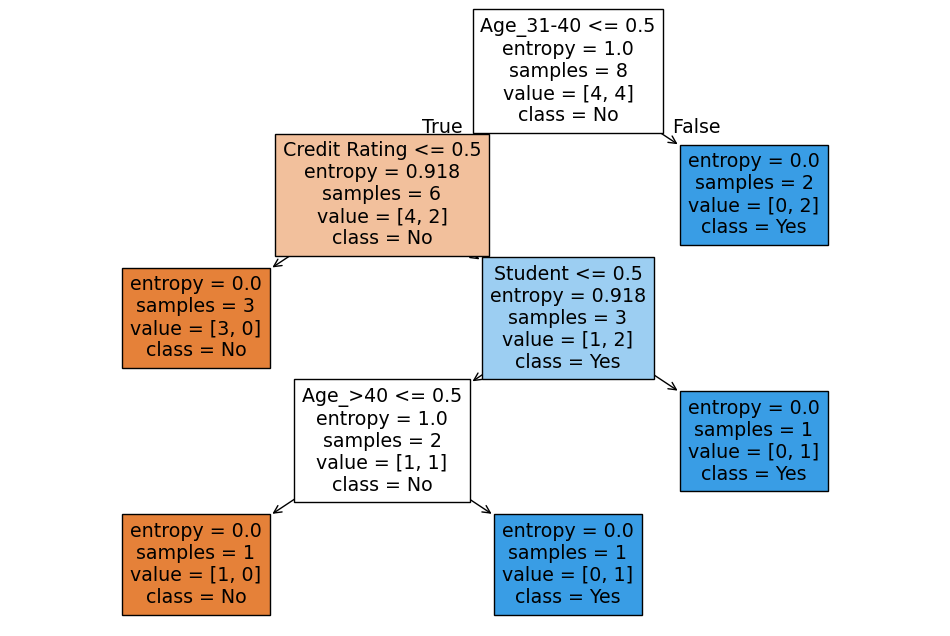

In [ ]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()